In [1]:
pip install seaborn==0.11.0

     ------------------------------------- 283.1/283.1 kB 65.4 kB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

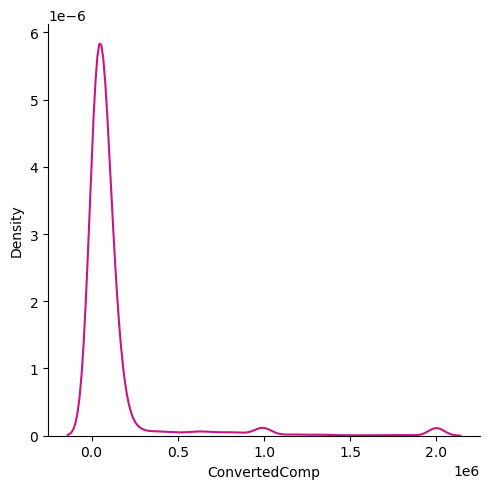

In [4]:
sns.displot(data=df['ConvertedComp'],x=df['ConvertedComp'], kind='kde', color = 'mediumvioletred')
plt.show()


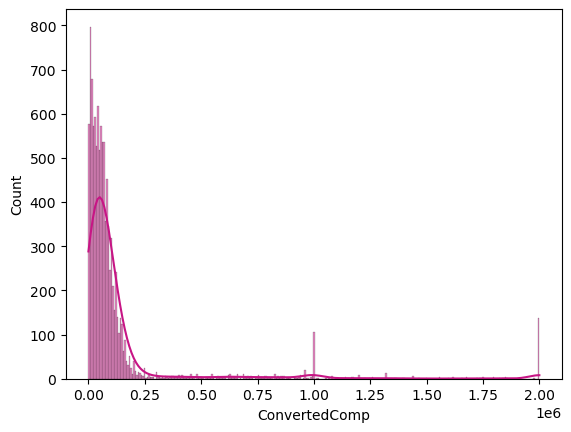

In [5]:
sns.histplot(data=df['ConvertedComp'],x=df['ConvertedComp'], kde = True, color = 'mediumvioletred')
plt.show()


In [6]:
df['ConvertedComp'].median()

57745.0

In [7]:
df1=df[df['Gender'] == 'Man']
df1.shape

(10480, 85)

In [8]:
df1=df[df['Gender'] == 'Woman']
df1['ConvertedComp'].median()

57708.0

In [10]:

print(df['Age'].median())
df['Age'].describe()

29.0


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

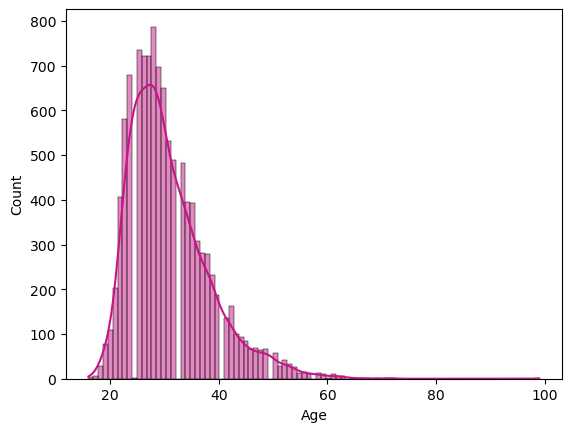

In [11]:
sns.histplot(data=df['Age'],x=df['Age'], kde = True, color = 'mediumvioletred')
plt.show()

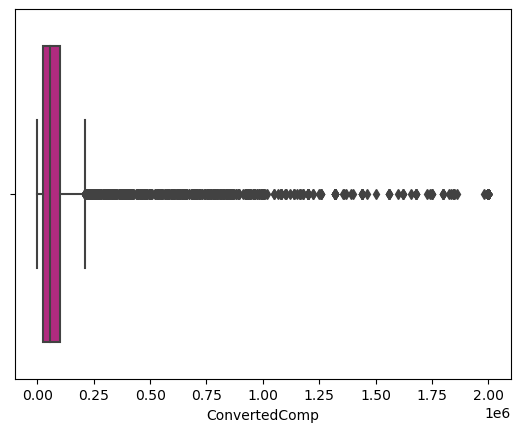

In [12]:
sns.boxplot(data=df['ConvertedComp'],x=df['ConvertedComp'], color = 'mediumvioletred')
plt.show()

In [13]:
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [14]:
quartiles = df['ConvertedComp'].quantile([0.25, 0.75])
Q1=quartiles[0.25]
Q3=quartiles[0.75] 
iqr = quartiles[0.75] - quartiles[0.25]
print(iqr)

73132.0


In [15]:
threshold = 1.5
outliers = df[(df['ConvertedComp'] < Q1 - threshold * iqr) | (df['ConvertedComp'] > Q3 + threshold * iqr)]
outliers.shape

(879, 85)

In [16]:
df = df.drop(outliers.index)

In [17]:
corr_matrix = df.corr()['Age']
corr_matrix

Respondent       0.003950
CompTotal        0.006371
ConvertedComp    0.401821
WorkWeekHrs      0.037452
CodeRevHrs      -0.017961
Age              1.000000
Name: Age, dtype: float64